In [ ]:
import pandas as pd

In [ ]:
car=pd.read_csv('/content/cars.csv')

In [ ]:
car.head()

,Year_name,Price,Kms,Fuel,Ownership,Type,Model,Year,Name
0,2014 Hyundai Grand i10,"3,63,000","44,523 km",Petrol,2,Manual,SPORTZ 1.2 KAPPA VTVT,2014,Hyundai Grand i10
1,2017 Hyundai Grand i10,"4,82,000","63,011 km",Petrol,1,Manual,SPORTZ 1.2 KAPPA VTVT,2017,Hyundai Grand i10
2,2014 Hyundai Grand i10,"3,34,000","96,601 km",Petrol,2,Manual,SPORTZ 1.2 KAPPA VTVT,2014,Hyundai Grand i10
3,2017 Hyundai Grand i10,"3,83,000","28,399 km",Petrol,2,Manual,ERA 1.2 KAPPA VTVT,2017,Hyundai Grand i10
4,2016 Hyundai Grand i10,"3,95,000","35,432 km",Petrol,2,Manual,SPORTZ 1.2 KAPPA VTVT,2016,Hyundai Grand i10


In [ ]:
car.isnull().sum()

 Year_name    0
Price         0
Kms           0
Fuel          0
Ownership     0
Type          0
Model         0
Year          0
Name          0
dtype: int64

In [ ]:
car["Price"]=car["Price"].str.replace(",","")

In [ ]:
car["Kms"]=car["Kms"].str.replace(",","")
car["Kms"]=car["Kms"].str.replace("km","")

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0    Year_name  874 non-null    object
 1   Price       874 non-null    object
 2   Kms         874 non-null    object
 3   Fuel        874 non-null    object
 4   Ownership   874 non-null    int64 
 5   Type        874 non-null    object
 6   Model       874 non-null    object
 7   Year        874 non-null    int64 
 8   Name        874 non-null    object
dtypes: int64(2), object(7)
memory usage: 61.6+ KB


In [ ]:
car["Price"] = car["Price"].astype("int")
car["Kms"] =car["Kms"].astype("int")

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#from jupyterthemes import jtplot
#jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

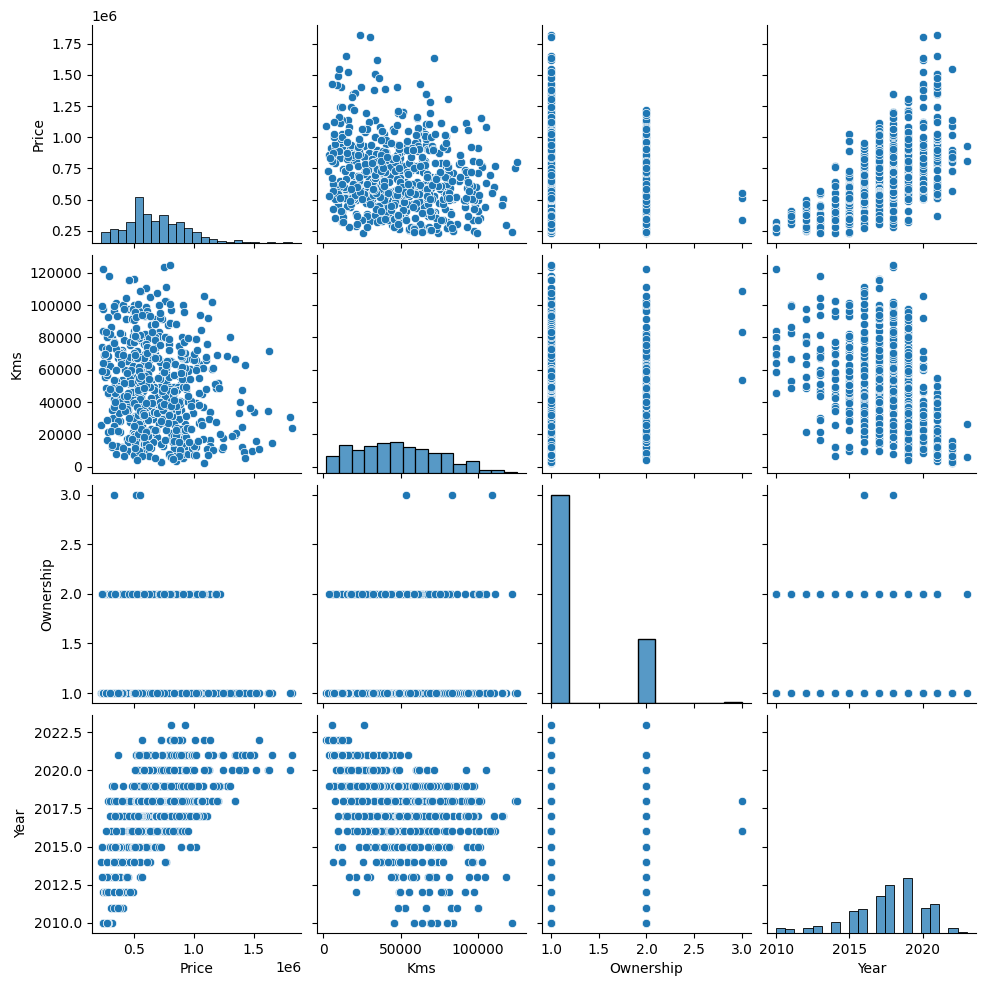

In [ ]:
sns.pairplot(car)

In [ ]:
car.columns

Index([' Year_name', 'Price', 'Kms', 'Fuel', 'Ownership', 'Type', 'Model',
       'Year', 'Name'],
      dtype='object')

In [ ]:
fig = px.histogram(car, x="Name",
                  labels = {"Name": "Manufacturer"},
                  title= "name of the car",
                  color_discrete_sequence=["red"])

fig.show()

In [ ]:
car.corr()

<ipython-input-54-3553584bfafd>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Price,Kms,Ownership,Year
Price,1.000000,-0.216128,-0.144167,0.554376
Kms,-0.216128,1.000000,0.048771,-0.473298
Ownership,-0.144167,0.048771,1.000000,-0.183610
Year,0.554376,-0.473298,-0.183610,1.000000


In [ ]:
car.dtypes

 Year_name    object
Price          int64
Kms            int64
Fuel          object
Ownership      int64
Type          object
Model         object
Year           int64
Name          object
dtype: object

In [ ]:
X=car[['Name','Year','Kms','Fuel','Type','Ownership','Model']]
y=car['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
ohe=OneHotEncoder()
ohe.fit(X[['Name','Fuel','Type','Model']])

OneHotEncoder()

In [ ]:
X

,Name,Year,Kms,Fuel,Type,Ownership,Model
0,Hyundai Grand i10,2014,44523,Petrol,Manual,2,SPORTZ 1.2 KAPPA VTVT
1,Hyundai Grand i10,2017,63011,Petrol,Manual,1,SPORTZ 1.2 KAPPA VTVT
2,Hyundai Grand i10,2014,96601,Petrol,Manual,2,SPORTZ 1.2 KAPPA VTVT
3,Hyundai Grand i10,2017,28399,Petrol,Manual,2,ERA 1.2 KAPPA VTVT
4,Hyundai Grand i10,2016,35432,Petrol,Manual,2,SPORTZ 1.2 KAPPA VTVT
...,...,...,...,...,...,...,...
869,Renault Duster,2017,48719,Petrol,Automatic,2,110 PS RXZ DIESEL
870,Renault Duster,2016,93415,Diesel,Manual,1,RXZ
871,Renault Duster,2021,7166,Petrol,Manual,1,RXZ DIESEL 110
872,Renault Duster,2018,83253,Diesel,Manual,1,110 PS RXL 4X2 AMT DIESEL


In [ ]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Fuel','Type','Model']),
                                    remainder='passthrough')

In [ ]:
xgb = XGBRegressor()


In [ ]:
pipe=make_pipeline(column_trans,xgb)


In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ford Ecosport', 'Honda Amaze', 'Honda City', 'Honda WR-V',
       'Hyundai Creta', 'Hyundai Elite i20', 'Hyundai Grand i10',
       'Hyundai NEW SANTRO', 'Hyundai VENUE', 'Hyundai Verna',
       'Maruti Alto 800', 'Maruti Baleno', 'Maruti Ciaz', 'Maruti IGNI...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.9196625688872186

In [ ]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    xgb = XGBRegressor()
    pipe=make_pipeline(column_trans,xgb)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)

159

In [ ]:
scores[np.argmax(scores)]

0.9835988659097019

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 351 to 649
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       88 non-null     object
 1   Year       88 non-null     int64 
 2   Kms        88 non-null     int64 
 3   Fuel       88 non-null     object
 4   Type       88 non-null     object
 5   Ownership  88 non-null     int64 
 6   Model      88 non-null     object
dtypes: int64(3), object(4)
memory usage: 5.5+ KB


In [ ]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Toyota Corolla Altis',13,69278 ,'Petrol','Manual',2,'G PETROL']).reshape(1,7)))

array([270040.72], dtype=float32)

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('LRModel.pkl','wb'))

In [ ]:
pipe.predict(pd.DataFrame(columns=['Name','Year','Kms','Fuel','Type','Ownership','Model'],data=np.array(['Toyota Corolla Altis',13,69278 ,'Petrol','Manual',2,'G PETROL']).reshape(1,7)))

array([270040.72], dtype=float32)

In [ ]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Ford Ecosport', 'Honda Amaze', 'Honda City', 'Honda WR-V',
       'Hyundai Creta', 'Hyundai Elite i20', 'Hyundai Grand i10',
       'Hyundai NEW SANTRO', 'Hyundai VENUE', 'Hyundai Verna',
       'Maruti Alto 800', 'Maruti Baleno', 'Maruti Ciaz', 'Maruti IGNIS',
       'Maruti New Wagon-R', 'Maruti Swift', 'Maruti Vitara Brezza',
       'Renault Duster', 'Renault Kiger', 'Renault Kwid', 'Tata NEXON',
       'Toyota Corolla Altis'], dtype=object)